### How to use Detector Sim

In [1]:
#import necessary modules
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from nuflux.detgeo import SimulateDecays, SimulateDetector, check_mem, plot, event_timing, phi_distribution

In [2]:
# load the muon decays from nuflux; alr_loaded and dt (opt) in case the decay sim has been pre-generated with nuflux.data.get_particles.
#possible parameter sets are mutristan (s), mutristan (l), mucol s1, mucol s2, and scd cern.
cc = SimulateDecays('mutristan s', N_evals = 1e5, alr_loaded = False, dt = None)

Simulation: mutristan_small parameter set with 1.000e+05 evaluations 
1.875e+05 MC generations; took 4.2 s


In [6]:
# muon decay simulation; Lss is the length of the straight segment. geom is the filename for the the detector. collision is the collision type (mu+e-, mu+mu+, mu+mu-).
# if want to just generate for one particle, can specify nue, nuebar, numu, numubar. show_components and show_time is for detailed distribution of neutrinos in detector parts
# and the time it takes different parts of the simulation.
Lss = 50
geom = "det_v2"
collision = 'mu+mu-'
sims = SimulateDetector(cc, geom, particle = None, Lss = Lss).run(show_components = 0, show_time = 0, collision = collision)

Simulation: muTRISTAN (s) (μ+μ-) at L = 50.00 m with Det v2 as a detector
Total Count: 1.39e+11 events; took 1.93 s


In [8]:
# if show time and show components
collision = 'mu+e-'
sims = SimulateDetector(cc, geom, particle = None, Lss = Lss).run(show_components = 1, show_time = 1, collision = collision)

Simulation: muTRISTAN (s) (μ+e-) at L = 50.00 m with Det v2 as a detector
Total Count: 1.33e+11 events; took 0.965 s
+----------------+------------+------------+--------------+
| Detector Parts | ν_e events | ν_μ events | Total Events |
+----------------+------------+------------+--------------+
| muon_detector  | 5.190e+10  | 3.039e+10  |  8.229e+10   |
|    solenoid    | 2.855e+09  | 1.591e+09  |  4.446e+09   |
|      hcal      | 2.489e+10  | 1.389e+10  |  3.878e+10   |
|      ecal      | 4.558e+09  | 2.810e+09  |  7.368e+09   |
|    nozzles     | 5.372e+06  | 7.207e+06  |  1.258e+07   |
|     TOTAL      | 8.420e+10  | 4.869e+10  |  1.329e+11   |
+----------------+------------+------------+--------------+
+-----------------+-----------+---------------+-----------+
| Simulation Time |  ν_e time | anti ν_μ time |   TOTAL   |
+-----------------+-----------+---------------+-----------+
|       init      | 8.027e-03 |   8.083e-03   | 1.611e-02 |
|     init obj    | 4.921e-03 |   5.041e-03

In [9]:
# for mu+mu- collision, all diff neutrinos
collision = 'mu+mu-'
sims = SimulateDetector(cc, geom, particle = None, Lss = Lss).run(show_components = 1, show_time = 1, collision = collision)

Simulation: muTRISTAN (s) (μ+μ-) at L = 50.00 m with Det v2 as a detector
Total Count: 1.36e+11 events; took 1.77 s
+----------------+------------+-----------------+------------+-----------------+--------------+
| Detector Parts | ν_e events | anti ν_e events | ν_μ events | anti ν_μ events | Total Events |
+----------------+------------+-----------------+------------+-----------------+--------------+
| muon_detector  | 2.595e+10  |    1.309e+10    | 3.023e+10  |    1.520e+10    |  8.447e+10   |
|    solenoid    | 1.427e+09  |    7.194e+08    | 1.583e+09  |    7.955e+08    |  4.526e+09   |
|      hcal      | 1.244e+10  |    6.275e+09    | 1.381e+10  |    6.947e+09    |  3.947e+10   |
|      ecal      | 2.279e+09  |    1.151e+09    | 2.794e+09  |    1.405e+09    |  7.629e+09   |
|    nozzles     | 2.686e+06  |    1.271e+06    | 7.261e+06  |    3.604e+06    |  1.482e+07   |
|     TOTAL      | 4.210e+10  |    2.124e+10    | 4.842e+10  |    2.435e+10    |  1.361e+11   |
+----------------+--

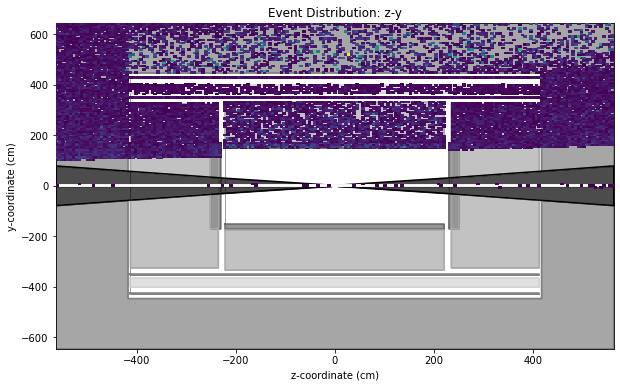

In [43]:
# for plotting; these are default values. give_da returns the x,y,z,weights arrays of the events. savefig is a link to a folder and filename to save the generated figure.
# orientation can be 'z-y', 'z-x', 'x-y' (at z ~ -150, I think)
plot(sims, nbins = 200, cmin = 1, orientation ='z-y', give_data = False, savefig = None, fs = (10,6))

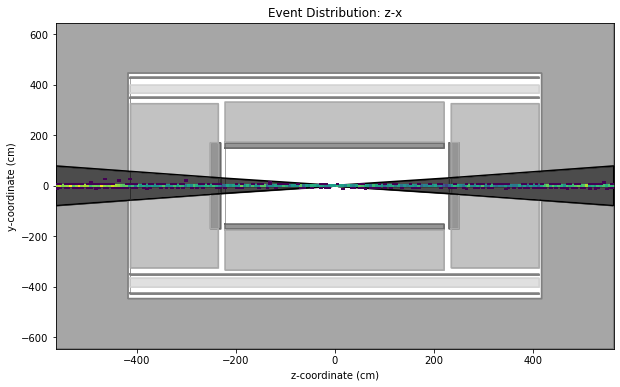

In [44]:
plot(sims, orientation ='z-x', fs = (10,6))

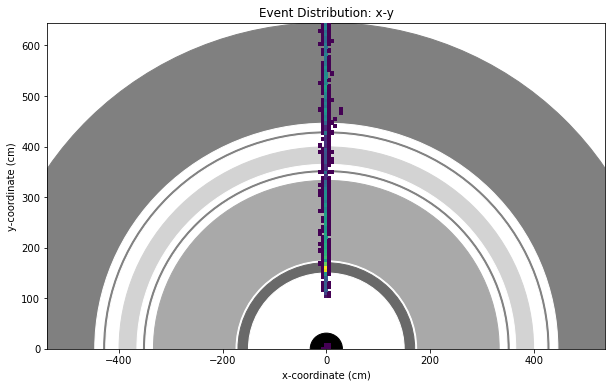

In [45]:
plot(sims, orientation ='x-y', fs = (10,6))

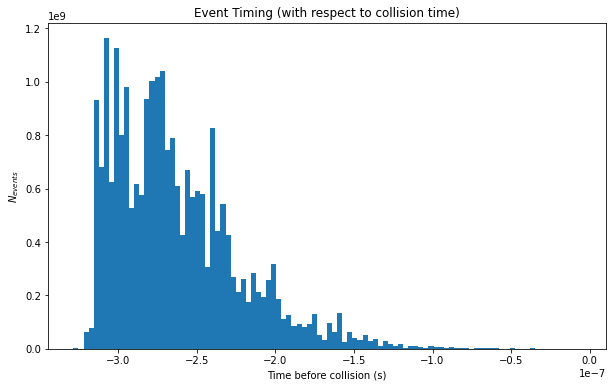

In [41]:
# plotting the event times; time 0 is the collision event
event_timing(sims, fs = (10,6))

In [ ]:
# plotting the phi distribution of these events!
phi_distribution(sims, fs = (10,6), ylog = True)

In [46]:
# a sim object has: times (neutrino interaction time wrt to collision time), E (eneregy), facecounts (for each detector component), and event positions (x,y,z) and weights (w)
vars(sims[0]).keys()

dict_keys(['time', 'Geometry', 'rmax', 'zending', 'face_dict', 'detname', 'particle', 'paramname', 'Lval', 'E', 'times', 'facecounts', 'w', 'arrx', 'arry', 'arrz', 'collision'])

In [21]:
# checking memory usage
check_mem()

Filename: /n/home06/lbojorquezlopez/BIN_MC/nuflux/detgeo.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    21    417.9 MiB    417.9 MiB           1   @profile
    22                                         def check_mem():
    23                                             '''For memory-consuming-checking processes.'''
    24    417.9 MiB      0.0 MiB           1       z = 1+2
    25    417.9 MiB      0.0 MiB           1       return


